In [1]:
import pickle
import numpy as np

In [2]:
with open('embeddings_all_l0.9.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [3]:
# normalize embeddings
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [6]:
embeddings = np.array(x)

In [8]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(embeddings[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [9]:

clusters = {}
parents = {}
curr_points = np.array(centroids.copy())
curr_labels = labels.copy()

for i in range(10):

    # calculate cosine distance

    distances = np.dot(curr_points, curr_points[i])    

    # sort the distances and get the indices
    sorted_distances = np.argsort(distances)
    print("sorted", sorted_distances.dtype)

    # add to the cluster the 10 closest points but not itself
    clusters[i] = curr_points[sorted_distances.astype(int)[:10]]
    #print(clusters[i])    
    parents[i] = (np.array(curr_labels)[sorted_distances])[:10]
    print(parents[i])

    # delete the points from the list
    curr_points = np.delete(curr_points, sorted_distances[:10], axis=0)
    curr_labels = np.delete(curr_labels, sorted_distances[:10], axis=0)

    # add the new point to the list
    #curr_points = np.vstack((curr_points, new_point_mean))
    print(curr_points.shape)



sorted int64
[79 47  8 46 24 70 52 54 20 41]
(90, 344)
sorted int64
[69 11 59 68  7 60 35 33 96 17]
(80, 344)
sorted int64
[82 37 99 18 40 19  6 89 53 12]
(70, 344)
sorted int64
[ 2 98 92 14  5 57 81  9 86 25]
(60, 344)
sorted int64
[15 29 23 49 90 62 44 56 71 84]
(50, 344)
sorted int64
[16 22  0 45 39 28 77 91 43 87]
(40, 344)
sorted int64
[76 31 58 38 34 42 65 36 13 85]
(30, 344)
sorted int64
[26 48 61 83 78 94 88 75 64  1]
(20, 344)
sorted int64
[30 97 73 32 50 66 95 93 27  3]
(10, 344)
sorted int64
[51 10 21 74 55 72 67  4 63 80]
(0, 344)


In [10]:
print(parents)

{0: array([79, 47,  8, 46, 24, 70, 52, 54, 20, 41]), 1: array([69, 11, 59, 68,  7, 60, 35, 33, 96, 17]), 2: array([82, 37, 99, 18, 40, 19,  6, 89, 53, 12]), 3: array([ 2, 98, 92, 14,  5, 57, 81,  9, 86, 25]), 4: array([15, 29, 23, 49, 90, 62, 44, 56, 71, 84]), 5: array([16, 22,  0, 45, 39, 28, 77, 91, 43, 87]), 6: array([76, 31, 58, 38, 34, 42, 65, 36, 13, 85]), 7: array([26, 48, 61, 83, 78, 94, 88, 75, 64,  1]), 8: array([30, 97, 73, 32, 50, 66, 95, 93, 27,  3]), 9: array([51, 10, 21, 74, 55, 72, 67,  4, 63, 80])}


In [11]:
reverse = {}

for key in parents.keys():
    for i in range(len(parents[key])):
        reverse[parents[key][i]] = key

print(reverse)


{79: 0, 47: 0, 8: 0, 46: 0, 24: 0, 70: 0, 52: 0, 54: 0, 20: 0, 41: 0, 69: 1, 11: 1, 59: 1, 68: 1, 7: 1, 60: 1, 35: 1, 33: 1, 96: 1, 17: 1, 82: 2, 37: 2, 99: 2, 18: 2, 40: 2, 19: 2, 6: 2, 89: 2, 53: 2, 12: 2, 2: 3, 98: 3, 92: 3, 14: 3, 5: 3, 57: 3, 81: 3, 9: 3, 86: 3, 25: 3, 15: 4, 29: 4, 23: 4, 49: 4, 90: 4, 62: 4, 44: 4, 56: 4, 71: 4, 84: 4, 16: 5, 22: 5, 0: 5, 45: 5, 39: 5, 28: 5, 77: 5, 91: 5, 43: 5, 87: 5, 76: 6, 31: 6, 58: 6, 38: 6, 34: 6, 42: 6, 65: 6, 36: 6, 13: 6, 85: 6, 26: 7, 48: 7, 61: 7, 83: 7, 78: 7, 94: 7, 88: 7, 75: 7, 64: 7, 1: 7, 30: 8, 97: 8, 73: 8, 32: 8, 50: 8, 66: 8, 95: 8, 93: 8, 27: 8, 3: 8, 51: 9, 10: 9, 21: 9, 74: 9, 55: 9, 72: 9, 67: 9, 4: 9, 63: 9, 80: 9}


In [12]:
# for each embedding fint the closest centroid

a = np.zeros((10,100))


for i, x in enumerate(embeddings):
    distances = np.dot(centroids, x)    
    #distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]    
    a[reverse[first_index]][y[i]] += 1

    

(100, 2)


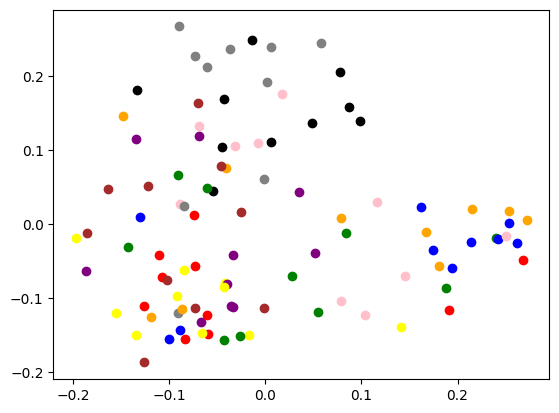

In [13]:
## do PCA on the centroids

pca_centroids = PCA(n_components=2)
pca_centroids.fit(centroids)

pca_centroids_transform = pca_centroids.transform(centroids)

print(pca_centroids_transform.shape)

# plot the centroids

import matplotlib.pyplot as plt

# color each centroid with the color of the parent cluster

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'grey']

for i in range(100):
    plt.scatter(pca_centroids_transform[i,0], pca_centroids_transform[i,1], color=colors[reverse[i]])

plt.show()

In [14]:
print(y.shape)
print(np.max(y))

(49984,)
99


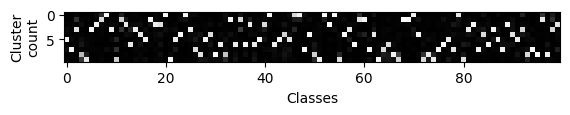

In [15]:
import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(a,cmap='Greys_r')

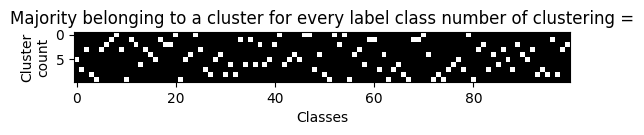

In [16]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((10,100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(c, cmap='Greys_r')

In [17]:
np.sum(c, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [18]:
false_negative = np.ma.array(a,mask=c)
sum_fn = np.sum(false_negative)
print(sum_fn/y.shape[0])

0.16969430217669654


In [19]:
with open('embeddings_all_l0.9_test.pkl', 'rb') as file:
    data = pickle.load(file)

x_test = data["outputs"].cpu().numpy()
y_test = data["labels"].cpu().numpy()
print(x_test.shape)
print(y_test.shape)

print(y_test[:30])

(10000, 344)
(10000,)
[17 75 46  0 96 27 65 13 87 68  4 13  2 32 85 23 71 63 50 41 32 17 97 32
 95 26 61 62 51  1]


In [37]:
# for each embedding fint the closest centroid
embeddings_test = np.array((x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test)))

In [38]:
# for each embedding fint the closest centroid

at = np.zeros((10,100))

for i, x in enumerate(embeddings_test):     
    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]        
    at[reverse[first_index]][y_test[i]] += 1

In [39]:
print(y_test[:20])

[17 75 46  0 96 27 65 13 87 68  4 13  2 32 85 23 71 63 50 41]


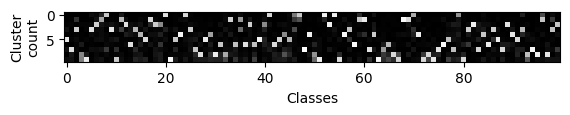

In [40]:

import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(at,cmap='Greys_r')

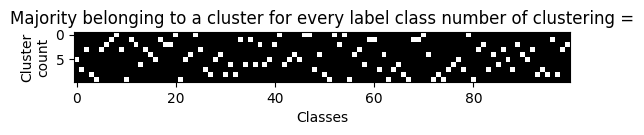

In [41]:
## majority voting for each class
bt = np.argmax(at, axis=0)

ct = np.zeros((10,100))
for x in range(100):    
    ct[bt[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(ct, cmap='Greys_r')

In [42]:
np.sum(ct, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [44]:
false_negative = np.ma.array(at,mask=ct)
sum_fn = np.sum(false_negative)
print(sum_fn/y_test.shape[0])

0.276
